#### **HSS 611 - Week 10: Visualization**

**October 30, 2023**

#### **Why data visualization?**

- Making informative visualizations (sometimes called figures or plots) is one of the most important tasks in data analysis
- It may be a part of the exploratory data analysis
  - (Conditional) disributions and correlations
  - Descriptive statistics, including  central tendency (mean, median), dispension (standard deviation, variance, interquartile range), or skewness
  - Missing data analysis
  - Outliers
  
- Or it may be a way of communicating the messages of your findings

#### **What is data visualization?**
- Data visualization is a graphical representation of data to understand patterns and communicate insights
- All data visualizations map data values into quantifiable features of graphic
- We refer to these features as aesthetics

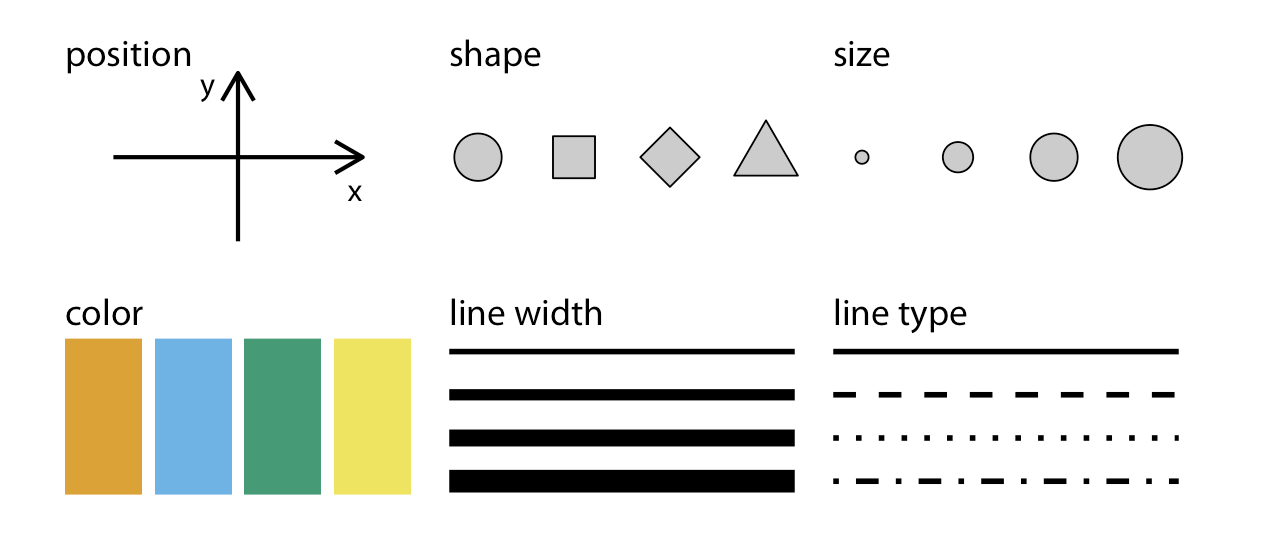

#### **A few principles**
- Choose the right plot type
- Be accurate on title, axes, groups, etc.
- Use colors that are consistent and substantively meaningful
- Provide sufficient (additinoal) explanation on your plot (including the plot itself, caption, and main text)

#### **Recommended readings**
- *Fundamentals of Data Visualization* by Clause O. Wilke
- Available [here](https://clauswilke.com/dataviz/)

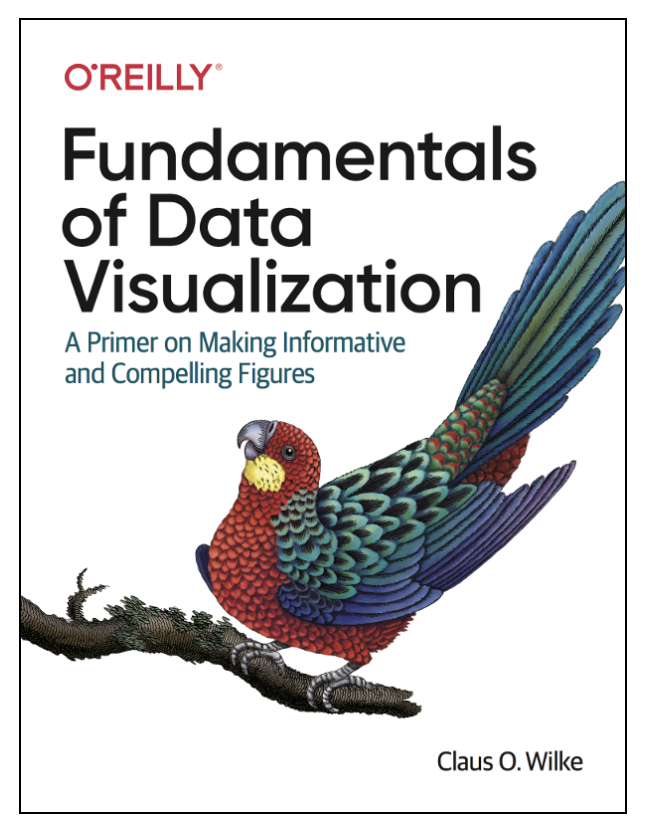


#### **Matplotlib**

- Today, introduction to key visualization techniques in Python focused on `matplotlib` (among many other tools)
- Other Python tools include `seaborn`, `pandas`, `plotly`, `bokeh`, etc.
- A (primarily 2D) desktop plotting package designed for creating publication-quliaty plots
- Started by John Hunter in 2002 to enable a MATLAB-like plotting interface in Python


In [ ]:
import matplotlib.pyplot as plt

#### **Direct vs. Object-oriented**

1. **`pyplot`-based (Stateful) approach**:
   - Often used for simpler plots and quick visualizations
   - Uses a stateful approach, meaning it keeps track of the current figure and plotting area, and the plotting functions are directed to the current axes
   - Commands like `plt.plot()`, `plt.title()`, and `plt.legend()` act on the "current" figure or axes

2. **Object-Oriented (OO) approach**:
   - Provides more control and is used for more complex visualizations
   - Involves explicitly creating figure and axes objects and calling methods on them
   - The main idea is to create objects and then invoke methods on those objects to customize and render the plot
   - Commonly used with the `fig, ax = plt.subplots()` idiom to create a figure (`fig`) and one or more axes (`ax`), and then calling methods on `ax` like `ax.plot()`, `ax.set_title()`, and `ax.legend()`

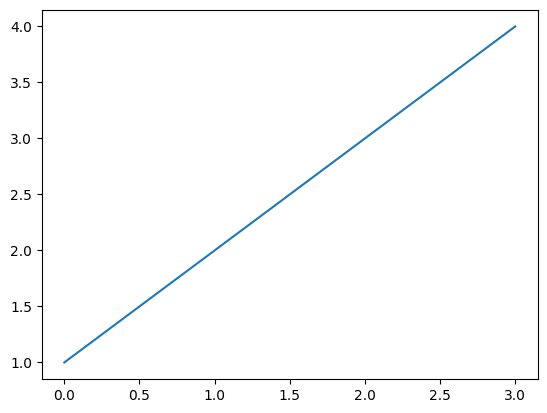

In [ ]:
### Stateful approach

plt.figure() # initiate a figure
plt.plot([1, 2, 3, 4]) # plot line
plt.show(); # show plot

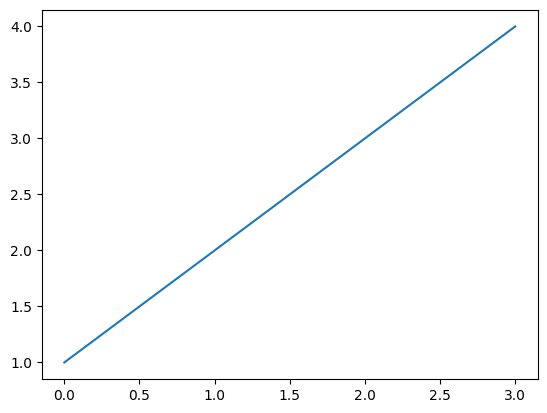

In [ ]:
### OO approach

fig = plt.figure() # initiate figure
ax = fig.add_subplot() # add subplot (axis)
ax.plot([1, 2, 3, 4]) # plot line
plt.show(); # show plot

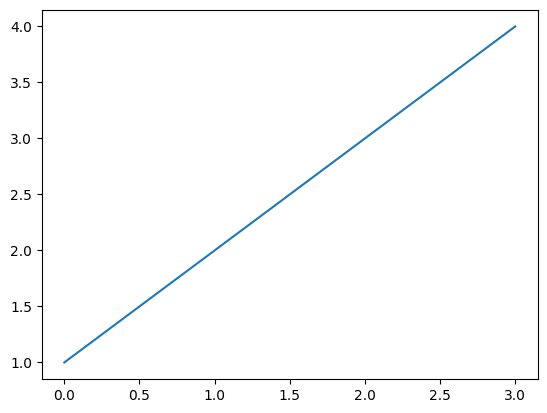

In [312]:
### OO approach

fig, ax = plt.subplots() # initiate figure and subplot (axis) together
ax.plot([1, 2, 3, 4]) # plot line
plt.show(); # show plot

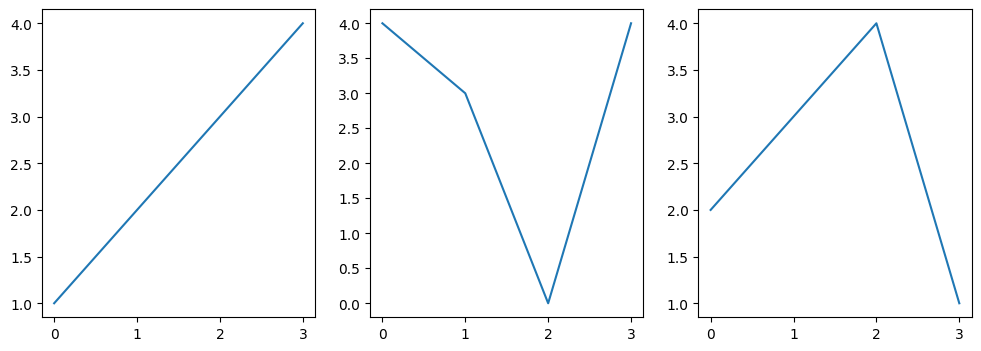

In [315]:
### OO approach

fig, ax = plt.subplots(1, 3, figsize = (12, 4)) # initiate figure and multiple subplots (axes)
ax[0].plot([1, 2, 3, 4]) # plot line
ax[1].plot([4, 3, 0, 4]) # plot line
ax[2].plot([2, 3, 4, 1]) # plot line
plt.show(); # show plot

####**Which to use?**
- For simple plots, the `pyplot` approach can be more convenient
- For more complex visualizations, especially those involving multiple subplots or customizations, the OO approach is often more suitable because of the fine-grained control it offers

#### **Histogram**
* Data Type: Continuous, sometimes discrete
* Useful For: Understanding the distribution of a single variable

In [316]:
import pandas as pd
import numpy as np

mean_hours = 30
std_deviation = 7
num_students = 100
hours_spent_male = np.random.normal(mean_hours, std_deviation, num_students)
hours_spent_female = np.random.normal(mean_hours + 5, std_deviation - 1, num_students)
hours_spent_male = np.clip(hours_spent_male, 0, None)  # ensuring no negative values
hours_spent_female = np.clip(hours_spent_female, 0, None)  # ensuring no negative values

df_ig = pd.DataFrame({'male': hours_spent_male,
                     'female': hours_spent_female})

print(df_ig)

         male     female
0   19.663399  32.683863
1   37.404607  29.505470
2   26.274993  36.497657
3   27.280022  20.355776
4   22.132851  33.894266
..        ...        ...
95  32.461636  32.713174
96  33.980512  38.622279
97  32.680452  43.409002
98  41.385015  27.746847
99  31.652301  31.604377

[100 rows x 2 columns]


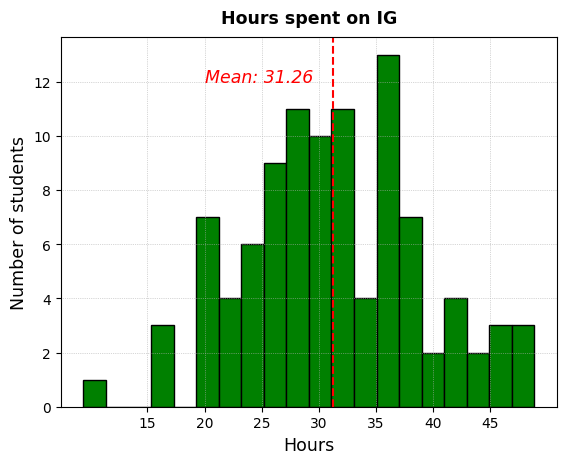

In [318]:
fig, ax = plt.subplots()

ax.hist(df_ig['male'], # specify data
        bins = 20, # number of bins
        color = 'green', # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar') # hist type

ax.set_title("Hours spent on IG", # add title
             fontsize = 12.5,
             weight = 'bold',
             pad = 10,
             loc = 'center')
ax.set_xlabel("Hours", # add x-axis label
              fontsize = 12.5)
ax.set_ylabel("Number of students", # add y-axis label
              fontsize = 12.5)

ax.set_xticks(range(15, 50, 5))

ax.axvline(np.mean(df_ig['male']), # add vertical line
           color = 'red',
           linestyle = '--',
           linewidth = 1.5)
ax.text(20, 12, # add text
        'Mean: ' + str(round(np.mean(df_ig['male']), 2)),
        color = 'red',
        fontsize = 12.5,
        style = 'italic',
        rotation = 0)

ax.grid(True, linestyle = ':', linewidth = 0.5) # add grid

plt.show();

<class 'matplotlib.figure.Figure'>
<class 'numpy.ndarray'>
(3,)
<class 'matplotlib.axes._axes.Axes'>


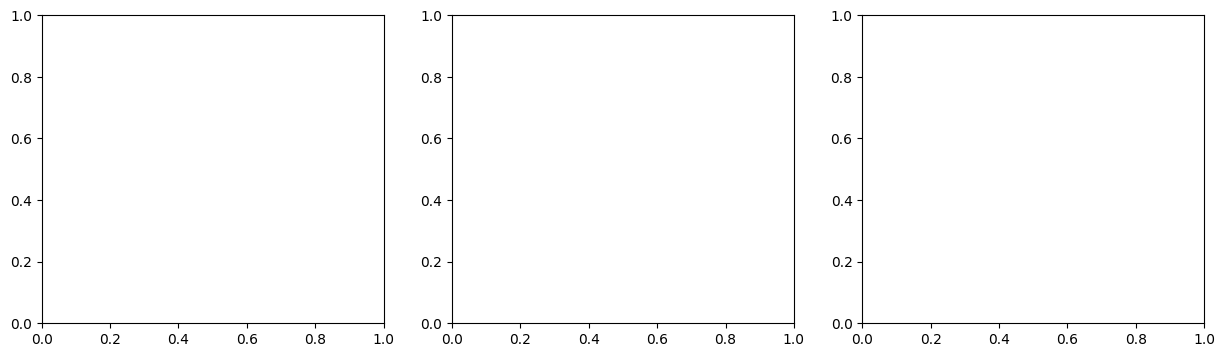

In [319]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))

print(type(fig))
print(type(axs))
print(axs.shape)
print(type(axs[0]))

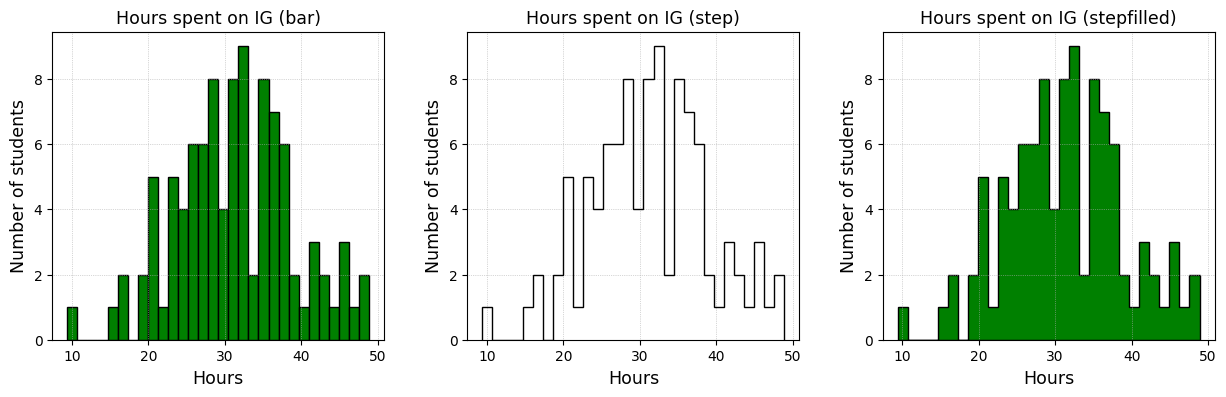

In [323]:
### different types

fig, axs = plt.subplots(1, 3, figsize = (15, 4))

axs[0].hist(df_ig['male'], # specify data
        bins = 30, # number of bins
        color = 'green', # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar') # hist type
axs[0].set_title("Hours spent on IG (bar)", fontsize = 12.5) # title
axs[0].set_xlabel("Hours", fontsize = 12.5) # x-axis label
axs[0].set_ylabel("Number of students", fontsize = 12.5) # y-axis label
axs[0].grid(True, linestyle = ':', linewidth = 0.5) # grid

axs[1].hist(df_ig['male'], # specify data
        bins = 30, # number of bins
        color = 'green', # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'step') # hist type
axs[1].set_title("Hours spent on IG (step)", fontsize = 12.5) # title
axs[1].set_xlabel("Hours", fontsize = 12.5) # x-axis label
axs[1].set_ylabel("Number of students", fontsize = 12.5) # y-axis label
axs[1].grid(True, linestyle = ':', linewidth = 0.5) # grid

axs[2].hist(df_ig['male'], # specify data
        bins = 30, # number of bins
        color = 'green', # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'stepfilled') # hist type
axs[2].set_title("Hours spent on IG (stepfilled)", fontsize = 12.5) # title
axs[2].set_xlabel("Hours", fontsize = 12.5) # x-axis label
axs[2].set_ylabel("Number of students", fontsize = 12.5) # y-axis label
axs[2].grid(True, linestyle = ':', linewidth = 0.5) # grid

fig.subplots_adjust(wspace = 0.25, hspace = 0.25)

plt.show();

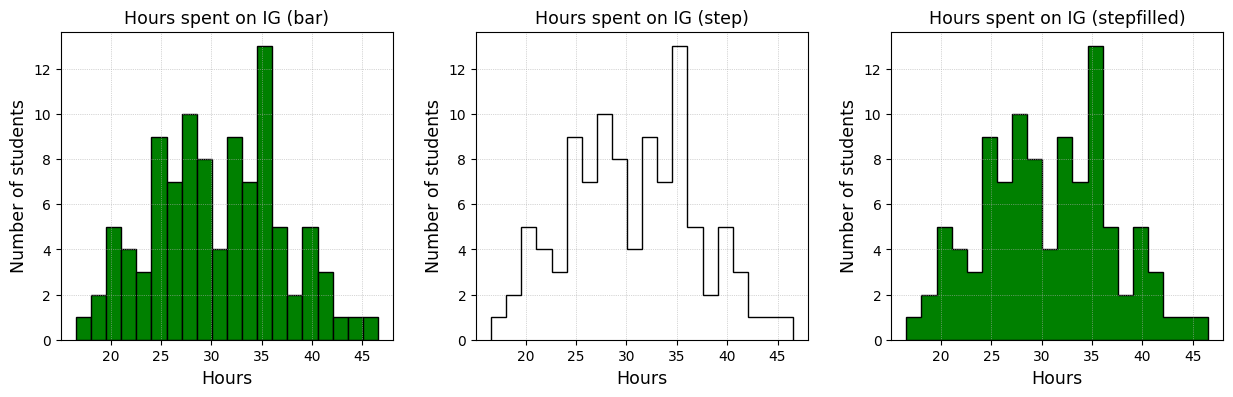

In [265]:
### different types (for loop)

fig, axs = plt.subplots(1, 3, figsize = (15, 4))
hist_types = ['bar', 'step', 'stepfilled']

for ax, hist_type in zip(axs, hist_types):
    ax.hist(df_ig['male'],
            bins = 20,
            color = 'green',
            edgecolor = 'black',
            histtype = hist_type)
    ax.set_title('Hours spent on IG ' + f'({hist_type})', fontsize = 12.5)
    ax.set_xlabel('Hours', fontsize = 12.5)
    ax.set_ylabel('Number of students', fontsize = 12.5)
    ax.grid(True, linestyle = ':', linewidth = 0.5)

fig.subplots_adjust(wspace = 0.25, hspace = 0.25)
plt.show();

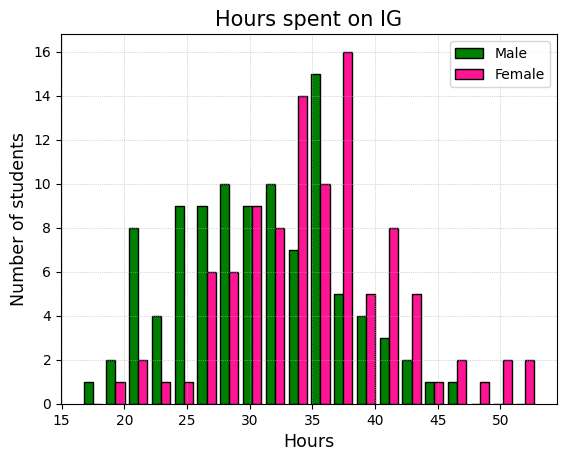

In [266]:
### two groups: default

fig, ax = plt.subplots()

ax.hist([df_ig['male'], df_ig['female']], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Male', 'Female']) # create legened labels

ax.set_title('Hours spent on IG', fontsize = 15) # title
ax.set_xlabel('Hours', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of students', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

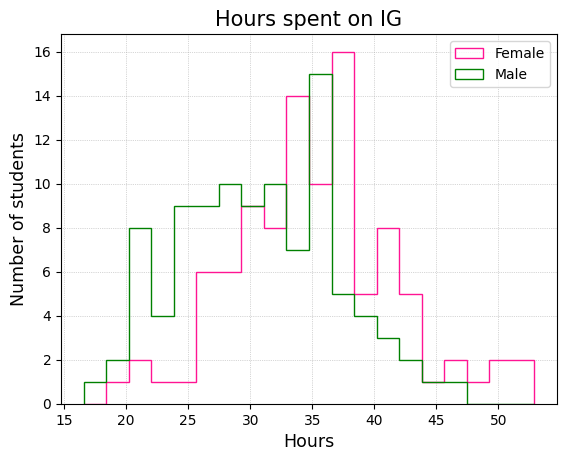

In [267]:
### two groups: step

fig, ax = plt.subplots()

ax.hist([df_ig['male'], df_ig['female']], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        histtype = 'step', # type of histogram
        label = ['Male', 'Female']) # create legened labels

ax.set_title('Hours spent on IG', fontsize = 15) # title
ax.set_xlabel('Hours', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of students', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

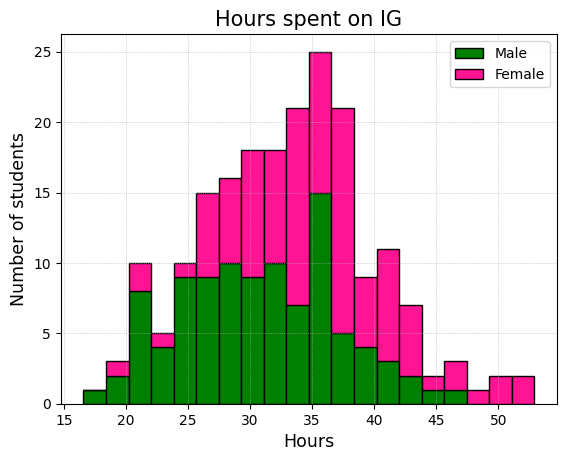

In [268]:
### two groups: stack (inaequate here)

fig, ax = plt.subplots()

ax.hist([df_ig['male'], df_ig['female']], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'barstacked', # type of histogram
        label = ['Male', 'Female']) # create legened labels

ax.set_title('Hours spent on IG', fontsize = 15) # title
ax.set_xlabel('Hours', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of students', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

In [324]:
### data where two groups differ in size

mean_hours = 30
std_deviation = 7
hours_spent_male = np.random.normal(mean_hours, std_deviation, 200)
hours_spent_female = np.random.normal(mean_hours + 5, std_deviation - 1, 500)
hours_spent_male = np.clip(hours_spent_male, 0, None)  # ensuring no negative values
hours_spent_female = np.clip(hours_spent_female, 0, None)  # ensuring no negative values

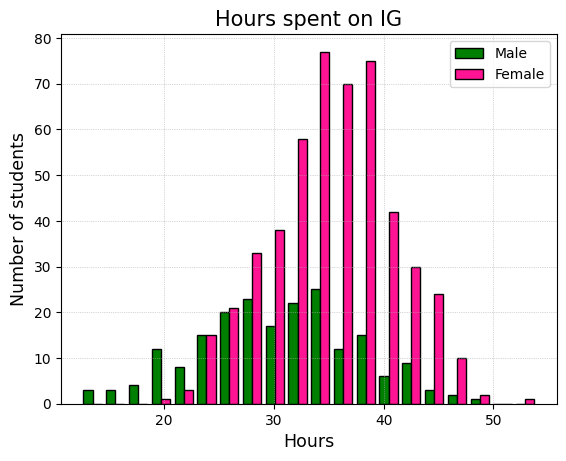

In [325]:
### two groups: default

fig, ax = plt.subplots()

ax.hist([hours_spent_male, hours_spent_female], # specify data
        bins = 20, # number of bins
        color = ['green', 'deeppink'], # bar color
        edgecolor = 'black', # bar edge color
        histtype = 'bar', # type of histogram
        label = ['Male', 'Female']) # create legened labels

ax.set_title('Hours spent on IG', fontsize = 15) # title
ax.set_xlabel('Hours', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of students', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

#### **Density plot**
* Data Type: Continuous, sometimes discrete
* Useful For: Understadning the distrbiution of continuous variable(s) without the influence of bin size and raw count

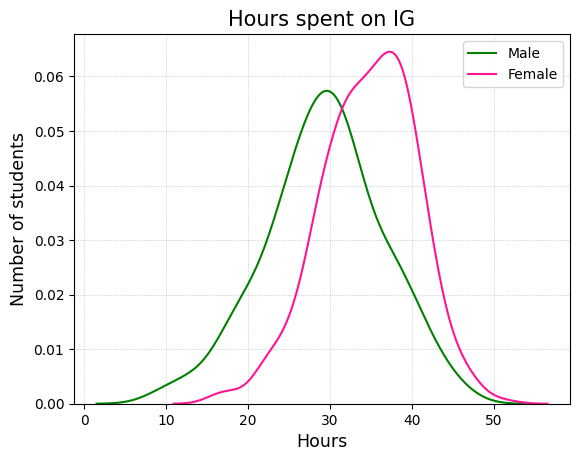

In [274]:
import seaborn as sns

fig, ax = plt.subplots()

sns.kdeplot(hours_spent_male, color = 'green', label = 'Male', ax = ax)
sns.kdeplot(hours_spent_female, color = 'deeppink', label = 'Female', ax = ax)

ax.set_title('Hours spent on IG', fontsize = 15) # title
ax.set_xlabel('Hours', fontsize = 12.5) # x-axis label
ax.set_ylabel('Number of students', fontsize = 12.5) # y-axis label

ax.legend(loc = 'upper right', fontsize = 10, ncols = 1) # add legend

ax.grid(True, linestyle = ':', linewidth = 0.5) # grid

plt.show();

#### **Cumulative density function**
* Data Type: Continuous, sometimes discrete
* Useful For: Understanding the probability that a variable will take a value less than or equal to X (providing insights into percentiles and is particularly useful when you want to determine the probability or likelihood of an outcome below a certain threshold)

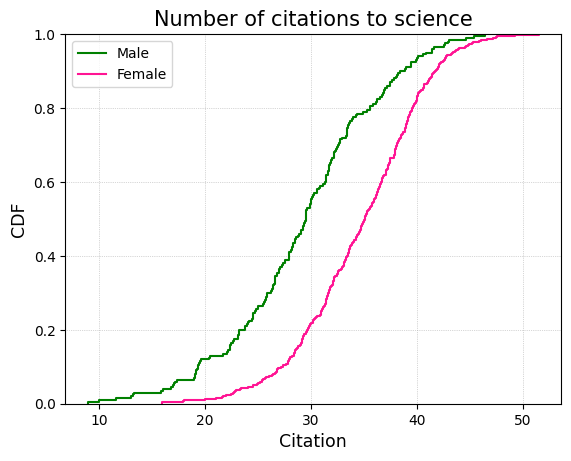

In [282]:
### cdf plot for multiple groups

fig, ax = plt.subplots()

sns.ecdfplot(x = hours_spent_male,
             color = 'green',
             label = 'Male',
             ax = ax)
sns.ecdfplot(x = hours_spent_female,
             color = 'deeppink',
             label = 'Female',
             ax = ax)

ax.set_title('Number of citations to science', fontsize=15)
ax.set_xlabel('Citation', fontsize = 12.5)
ax.set_ylabel('CDF', fontsize = 12.5)

ax.legend(loc = 'upper left', fontsize = 10, ncols = 1)

ax.grid(True, linestyle=':', linewidth = 0.5)

plt.show();

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_1 = "https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/policy_citations_example_2002_2018.csv"
url_2 = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/policy_citations_example_2019_2021.csv'
url_3 = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_9/tt_ideology.csv'

df1 = pd.read_csv(url_1)
df2 = pd.read_csv(url_2)
df3 = pd.read_csv(url_3)

df = pd.concat([df1, df2], axis = 0).reset_index(drop = True)
df_idgy = pd.merge(df, df3, how = 'left', left_on = 'policy_source_id_cited', right_on = 'policy_source_id')

df_idgy

,policy_document_id_citing,policy_source_type_citing,published_on_year_citing,policy_source_id_citing,policy_source_title_citing,ref_science_count_citing,policy_document_id_cited,policy_source_type_cited,published_on_year_cited,policy_source_id_cited,policy_source_title_cited,ref_science_count_cited,policy_source_id,policy_source_title,leaning
0,committee_senate-c4f03a93ab9bd337c65ddfc1f009599e,government,2002,committee_senate,Senate Committees,NaN,brookings-9241481704acebfa75f46cc3de1606a2,think tank,2020,brookings,Brookings Institution,3,brookings,Brookings Institution,L
1,epagov-6eb8c3c3a05cb50680983790367dccf3,government,2002,epagov,EPA,NaN,jamestownfoundation-2dee7114403ad4b9817e354a77...,think tank,2016,jamestownfoundation,Jamestown Foundation,0,jamestownfoundation,Jamestown Foundation,N
2,gpogov-492f4e14047a5911b6bdc5c93ec0d11f,government,2002,gpogov,Government Publishing Office,22.0,nber-ed165c7ffb7c0575f19478c95473a58d,think tank,2011,nber,NBER,21,nber,NBER,N
3,committee_house-986fed10f6aa0e045a08af44832782ea,government,2003,committee_house,House Committees,38.0,nber-f7f635c7e17cf47fb554a5a956b65e5b,think tank,2011,nber,NBER,9,nber,NBER,N
4,gaogov-f4ddb69df67e1ff56869b762b89f98cc,government,2004,gaogov,U.S. Government Accountability Office,2.0,aclu-00e5c0de2872497cd002f4cace467cb4,think tank,2015,aclu,ACLU,12,aclu,ACLU,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,committee_house-68a99c1dce5993ebda2fce5f279e5ade,government,2021,committee_house,House Committees,193.0,heritagefoundation-a80380083d620786efe432770a5...,think tank,2019,heritagefoundation,The Heritage Foundation,0,heritagefoundation,Heritage Foundation,R
196,committee_house-85d955465b35e27ab7f625f996bafb67,government,2021,committee_house,House Committees,12.0,carnegieendowment-77ae02ebc1459521e64593cc0669...,think tank,2020,carnegieendowment,Carnegie Endowment for International Peace,0,carnegieendowment,Carnegie Endowment for International Peace,N
197,congressionalresearch-3e57ab0e286f13256a1b45c5...,government,2021,congressionalresearch,Congressional Research Service,104.0,centeronbudgetandpolicypriorities-f450d94c2526...,think tank,2018,centeronbudgetandpolicypriorities,Center on Budget and Policy Priorities,0,centeronbudgetandpolicypriorities,Center on Budget and Policy Priorities,L
198,committee_house-ebf54acbce75836c4fb57f4ea1e7b16a,government,2021,committee_house,House Committees,0.0,aspeninstitute-413356d1478a9d90d05ffae5814f6c2c,think tank,2019,aspeninstitute,Aspen Institute,7,aspeninstitute,The Aspen Institute,N


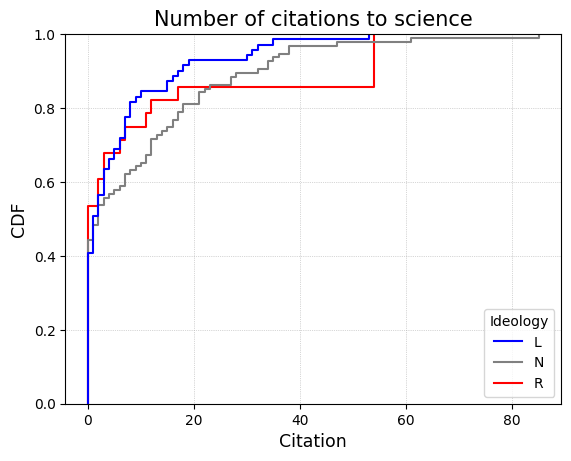

In [326]:
### cdf plot for multiple groups

fig, ax = plt.subplots()

sns.ecdfplot(x = 'ref_science_count_cited',
             hue = 'leaning',
             data = df_idgy,
             palette = {'L': 'blue', 'N': 'grey', 'R': 'red'},
             ax = ax)

sns.move_legend(ax, loc = 'lower right', title = 'Ideology')

ax.set_title('Number of citations to science', fontsize=15)
ax.set_xlabel('Citation', fontsize = 12.5)
ax.set_ylabel('CDF', fontsize = 12.5)

ax.grid(True, linestyle=':', linewidth = 0.5)

plt.show();

In [ ]:
### create a synthetic city populations dataset

small_cities = np.random.randint(100, 10_000, 5_000) # a large number of small cities
medium_cities = np.random.randint(10_000, 1_000_000, 500) # some medium-sized cities
megacities = np.random.randint(1_000_000, 10_000_000, 50) # a small number of mega cities

city_populations = np.concatenate([small_cities, medium_cities, megacities])

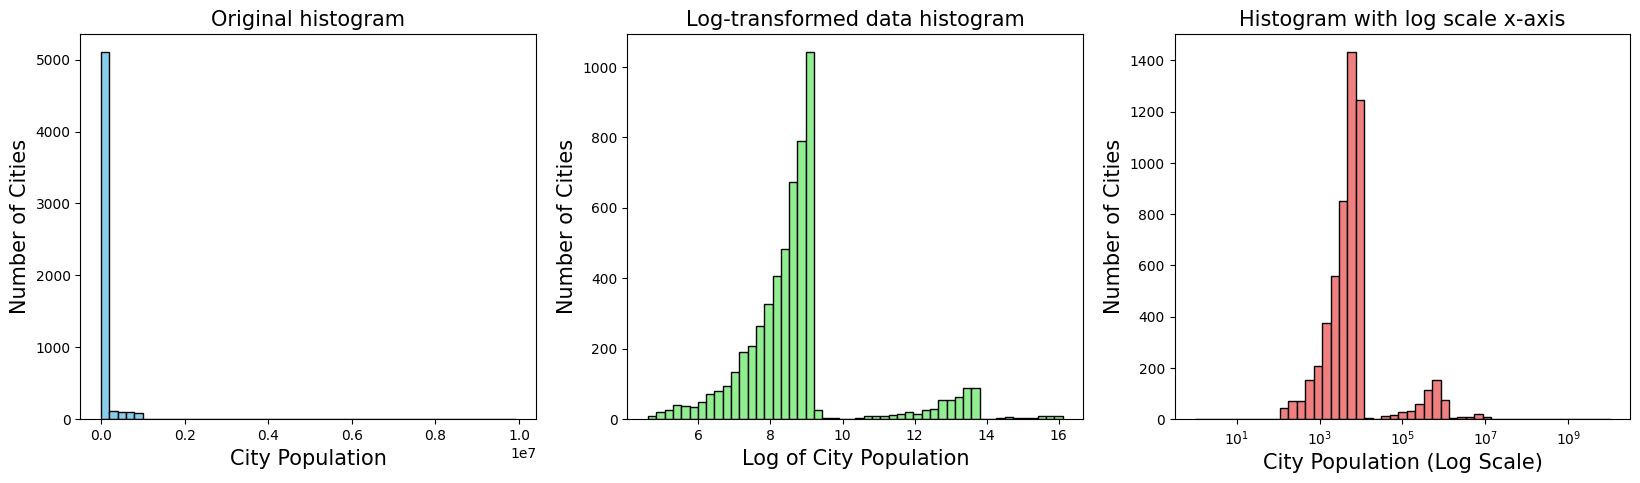

In [327]:
### create a figure with multiple subplots

fig, axs = plt.subplots(1, 3, figsize = (20, 5))

axs[0].hist(city_populations, # plot the original histogram
            bins = 50,
            color = 'skyblue',
            edgecolor = 'black')
axs[0].set_title('Original histogram', fontsize = 15)
axs[0].set_xlabel('City Population', fontsize = 15)
axs[0].set_ylabel('Number of Cities', fontsize = 15)

log_transformed_populations = np.log(city_populations) # apply log transformation to data and plot
axs[1].hist(log_transformed_populations,
            bins = 50,
            color = 'lightgreen',
            edgecolor = 'black')
axs[1].set_title('Log-transformed data histogram', fontsize = 15)
axs[1].set_xlabel('Log of City Population', fontsize = 15)
axs[1].set_ylabel('Number of Cities', fontsize = 15)

axs[2].hist(city_populations, # use a log scale on the histogram's x-axis
            bins = np.logspace(0, 10, 50),
            color = 'lightcoral',
            edgecolor = 'black')
axs[2].set_xscale('log')
axs[2].set_title('Histogram with log scale x-axis', fontsize = 15)
axs[2].set_xlabel('City Population (Log Scale)', fontsize = 15)
axs[2].set_ylabel('Number of Cities', fontsize = 15)

plt.show();

#### **Line plot**
* Data Type: Continuous (typically for data that changes over time)
* Useful For: Observing trends and patterns over time or another continuous variable
* Example: Stock prices over time or temperature trends over a year.

In [ ]:
url = 'https://raw.githubusercontent.com/taegyoon-kim/programming_dhcss_23fw/main/week_10/df_sales.csv'
df_sales = pd.read_csv(url)
df_sales

,group_1,group_2,group_3,group_4,group_5,group_6,month
0,883.097692,1283.113117,1086.232363,862.671478,1011.255173,1044.478377,January
1,1038.825531,1324.589308,1235.867917,1009.927418,994.276034,1144.557266,February
2,1154.180074,1362.445628,1326.784187,1067.281594,1113.122651,1334.082797,March
3,1109.380649,1451.719159,1316.190744,1073.628799,1207.778495,1271.105438,April
4,1161.821779,1414.768112,1337.931063,1062.336697,1064.408627,1212.469390,May
5,1193.141122,1320.570014,1283.379617,1062.630451,1094.220741,1231.775769,June
6,1106.222443,1332.848599,1270.727907,953.465445,1105.714399,1193.633139,July
7,1237.358464,1532.307719,1392.082548,1105.217189,1243.058944,1440.416959,August
8,1499.399015,1804.859518,1725.993057,1317.527262,1480.274454,1589.565727,September
9,1583.627086,1962.570810,1898.114795,1520.907480,1634.318095,1828.347386,October


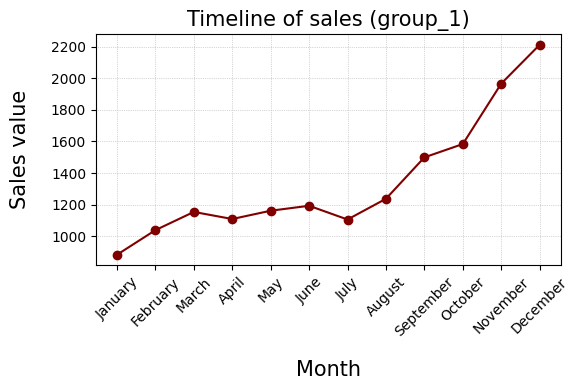

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(df_sales['month'], df_sales['group_1'], color = 'maroon', marker = 'o')

ax.set_title("Timeline of sales (group_1)", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

ax.tick_params(axis = 'x', rotation = 45)

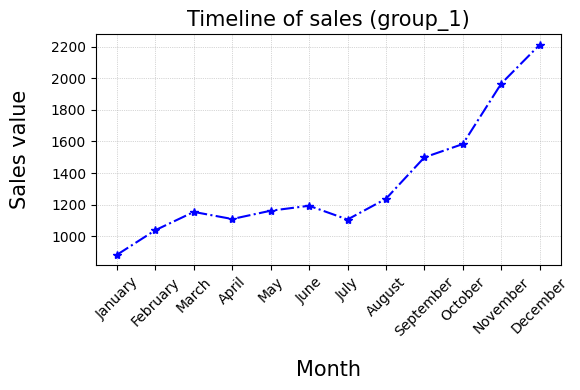

In [ ]:
fig, ax = plt.subplots(figsize = (6, 3))

ax.plot(df_sales['month'], df_sales['group_1'], color = 'blue', marker = '*', linestyle = '-.')

ax.set_title("Timeline of sales (group_1)", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

ax.tick_params(axis = 'x', rotation = 45)

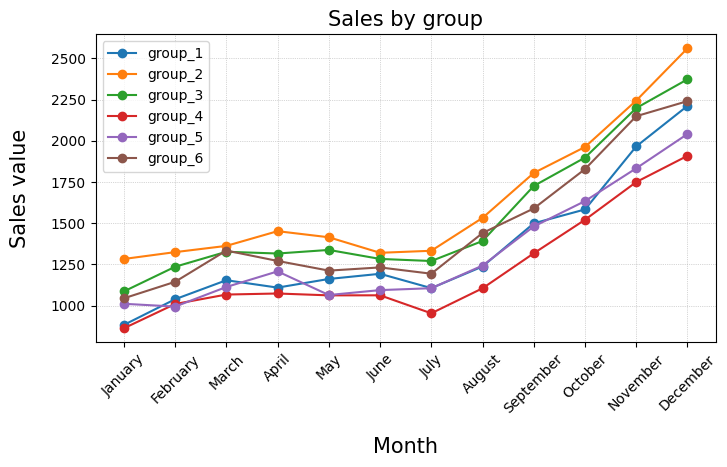

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

ax.plot(df_sales['month'], df_sales['group_1'], label = 'group_1', marker = 'o')
ax.plot(df_sales['month'], df_sales['group_2'], label = 'group_2', marker = 'o')
ax.plot(df_sales['month'], df_sales['group_3'], label = 'group_3', marker = 'o')
ax.plot(df_sales['month'], df_sales['group_4'], label = 'group_4', marker = 'o')
ax.plot(df_sales['month'], df_sales['group_5'], label = 'group_5', marker = 'o')
ax.plot(df_sales['month'], df_sales['group_6'], label = 'group_6', marker = 'o')

ax.set_title("Sales by group", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.legend()
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

plt.show();

In [ ]:
df_sales_melted = df_sales.melt(id_vars = ['month'],
                                var_name = 'group',
                                value_name = 'amount')
df_sales_melted

,month,group,amount
0,January,group_1,883.097692
1,February,group_1,1038.825531
2,March,group_1,1154.180074
3,April,group_1,1109.380649
4,May,group_1,1161.821779
...,...,...,...
67,August,group_6,1440.416959
68,September,group_6,1589.565727
69,October,group_6,1828.347386
70,November,group_6,2149.240023


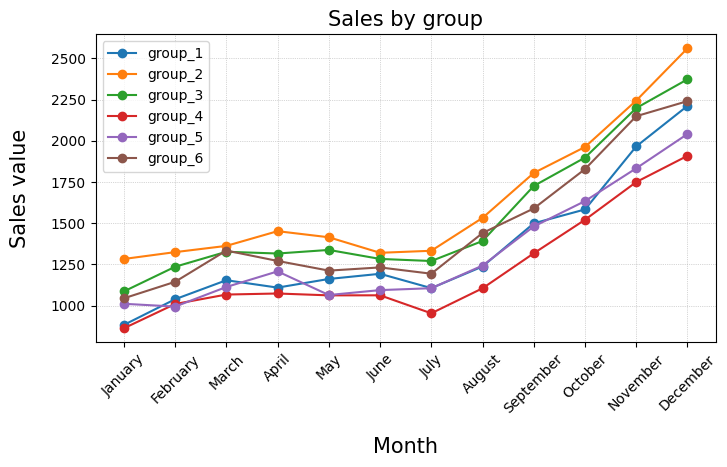

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

for group, data in df_sales_melted.groupby('group'):
    ax.plot(data['month'], data['amount'], label = group, marker = 'o')

ax.set_title("Sales by group", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.legend()
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

plt.show();

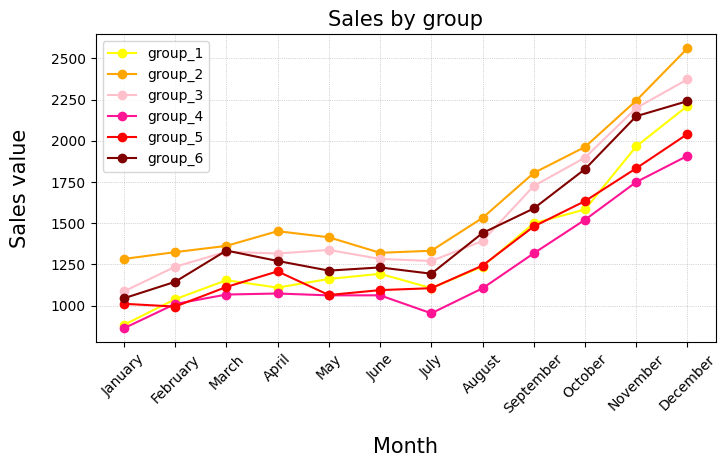

In [ ]:
fig, ax = plt.subplots(figsize = (8, 4))

colors = ['yellow', 'orange', 'pink', 'deeppink', 'red', 'maroon']

for (group, data), i in zip(df_sales_melted.groupby('group'), colors):
    ax.plot(data['month'], data['amount'], label = group, marker = 'o', color = i)

ax.set_title("Sales by group", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.legend()
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

plt.show();

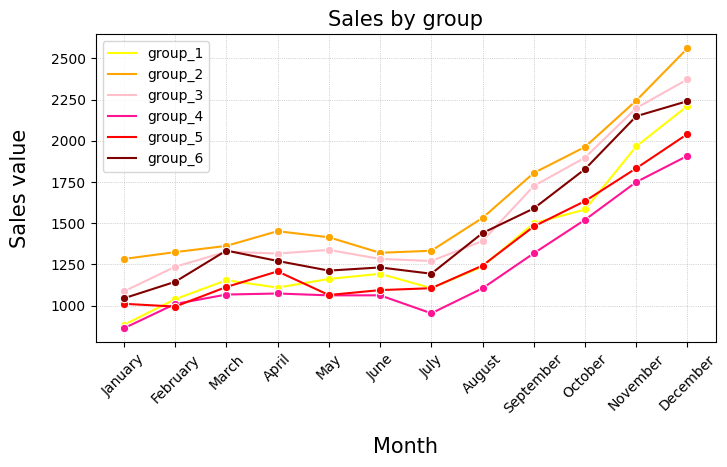

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 4))

colors = ['yellow', 'orange', 'pink', 'deeppink', 'red', 'maroon']

sns.lineplot(x = 'month',
             y = 'amount',
             hue = 'group',
             palette = colors,
             data = df_sales_melted,
             ax = ax,
             marker = 'o')

ax.set_title("Sales by group", fontsize = 15)
ax.set_xlabel("Month", labelpad = 15, fontsize = 15)
ax.set_ylabel("Sales value", labelpad = 15, fontsize = 15)

ax.legend()
ax.tick_params(axis = 'x', rotation = 45)
ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

plt.show();

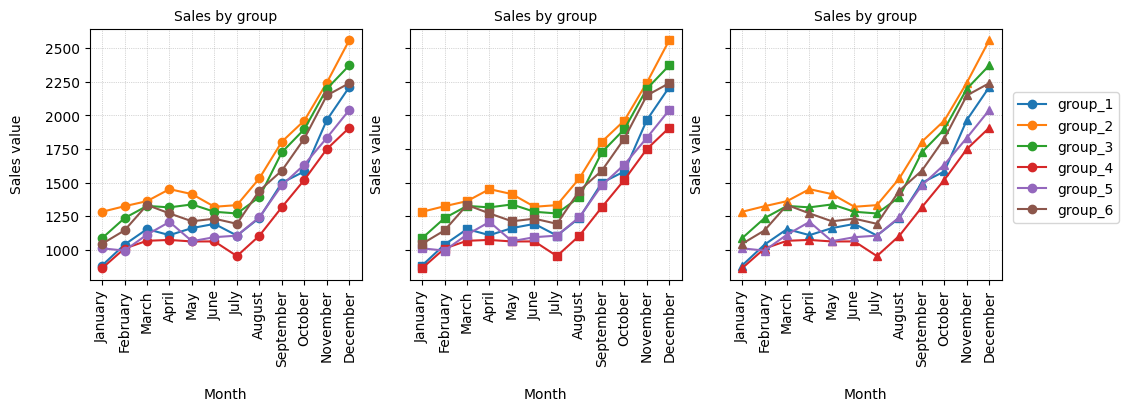

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4), sharex = True, sharey = True, constrained_layout = True)

df_sales_melted = df_sales.melt(id_vars = ['month'],
                                var_name = 'group',
                                value_name = 'amount')

markers = ['o', 's', '^']

for i, ax in enumerate(axs):

    for group, data in df_sales_melted.groupby('group'):
        ax.plot(data['month'], data['amount'], label = group, marker = markers[i])

    ax.set_title("Sales by group", fontsize = 10)
    ax.set_xlabel("Month", labelpad = 15, fontsize = 10)
    ax.set_ylabel("Sales value", labelpad = 15, fontsize = 10)

    ax.tick_params(axis = 'x', rotation = 90)
    ax.grid(axis = "both", linestyle = ':', linewidth = 0.5)

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'upper left', bbox_to_anchor = (1, 0.8))

plt.show();

#### **Bar plot**
* Data Type: Categorical (or discrete) on the x-axis and continuous or discrete on the y-axis
* Useful For: Comparing the quantity of different categories

In [ ]:
dict_research = {
    'period': ['Early', 'Middle', 'Late'],
    'author': ['A1', 'A1', 'A1'],
    'article': [7, 8, 4]
    }
df_research = pd.DataFrame(dict_research)

df_research

,period,author,article
0,Early,A1,7
1,Middle,A1,8
2,Late,A1,4


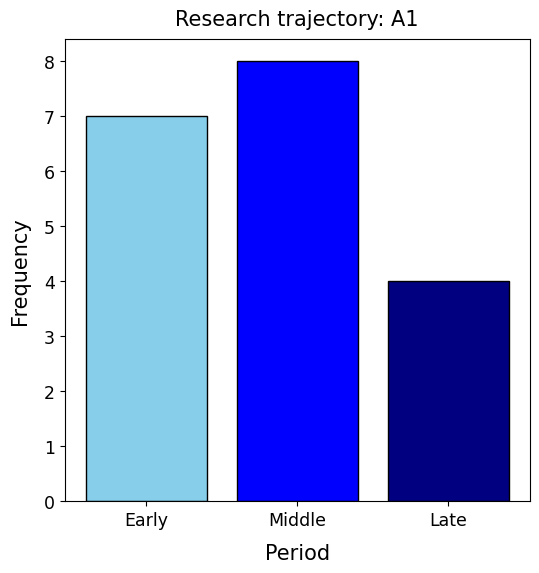

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.bar(df_research['period'], df_research['article'],
       color = ['skyblue', 'blue', 'navy'],
       edgecolor = 'black',
       width = 0.8)

ax.set_xlabel('Period', fontsize = 15, labelpad = 10)
ax.set_ylabel('Frequency', fontsize = 15, labelpad = 10)

ax.tick_params(axis = 'both', labelsize = 12.5)

ax.set_title('Research trajectory: A1', fontsize = 15, pad = 10)

plt.show();

In [ ]:
dict_research = {
    'period': ['Early', 'Middle', 'Late'] * 4,
    'author': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2',
               'A3', 'A3', 'A3', 'A4', 'A4', 'A4'],
    'article': [7, 8, 4, 6, 7, 5, 8, 9, 6, 7, 6, 5]
    }
df_research = pd.DataFrame(dict_research)

df_research

,period,author,article
0,Early,A1,7
1,Middle,A1,8
2,Late,A1,4
3,Early,A2,6
4,Middle,A2,7
5,Late,A2,5
6,Early,A3,8
7,Middle,A3,9
8,Late,A3,6
9,Early,A4,7


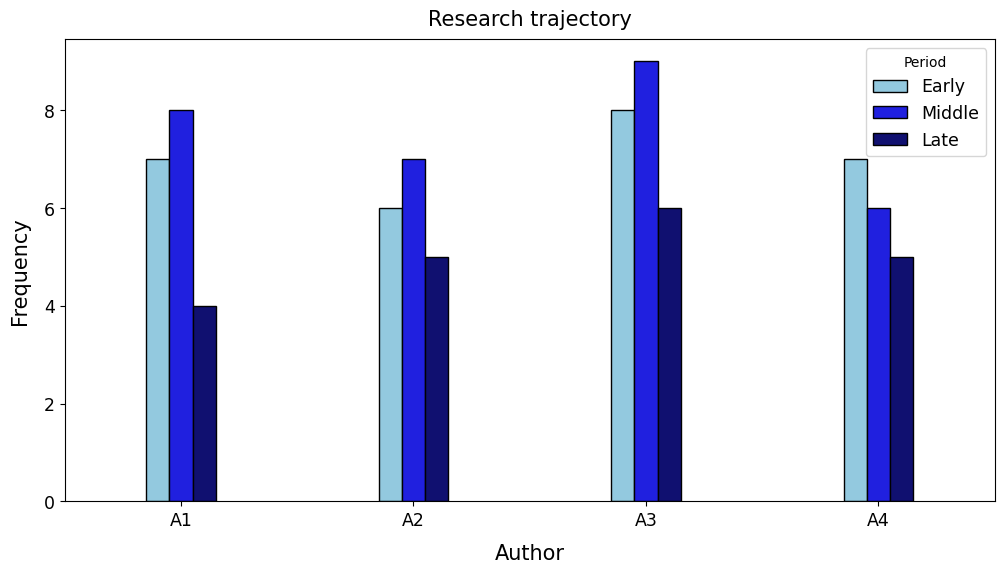

In [ ]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'author', y = 'article',
            hue = 'period',
            data = df_research, palette = ['skyblue', 'blue', 'navy'],
            edgecolor = 'black',
            width = 0.3)

plt.xlabel('Author', fontsize = 15, labelpad = 10)
plt.ylabel('Frequency', fontsize = 15, labelpad = 10)
plt.tick_params(axis = 'both', labelsize = 12.5)
plt.legend(title = "Period", fontsize = 12.5)
plt.title('Research trajectory', fontsize = 15, pad = 10)

plt.show()

#### **Scatter plot**

In [241]:
np.random.seed(42)

n = 300

a_education = np.random.normal(16, 1.5, n)  # Sleep in hours
a_income = 80000 + 3000 * a_education + np.random.normal(0, 5000, n)

b_education = np.random.normal(16, 1.5, n)  # Sleep in hours
b_income = 10000 + 7000 * b_education + np.random.normal(0, 5000, n)

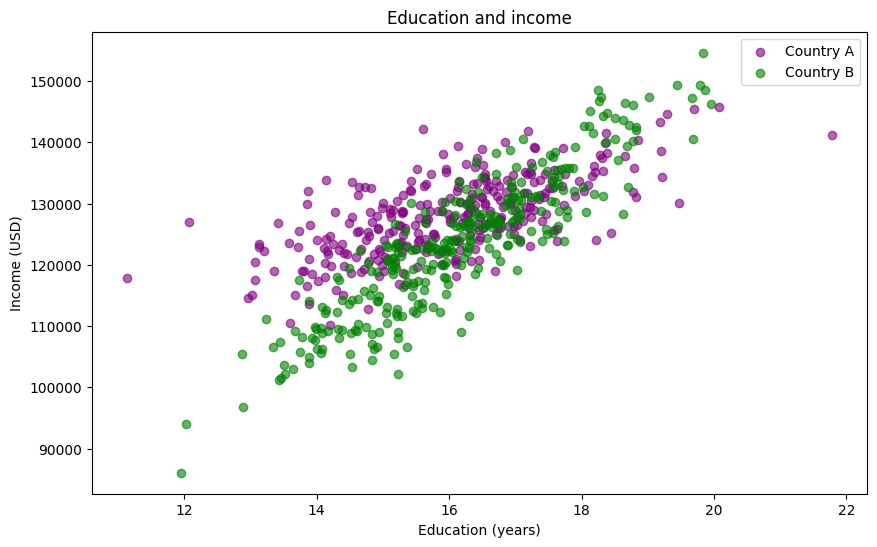

In [297]:
fig_scatter, ax = plt.subplots(figsize = (10, 6))

ax.scatter(a_education, a_income, color = 'purple', alpha = 0.6, label = 'Country A')
ax.scatter(b_education, b_income, color = 'green', alpha = 0.6, label = 'Country B')

ax.set_title('Education and income')
ax.set_xlabel('Education (years)')
ax.set_ylabel('Income (USD)')

ax.legend()

plt.show();

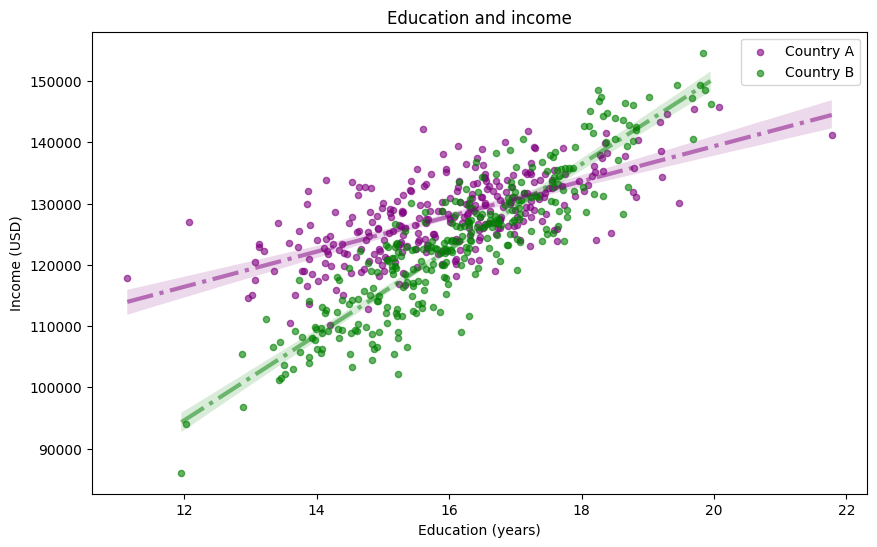

In [306]:
fig_scatter_reg, ax = plt.subplots(figsize = (10, 6))

sns.regplot(x = a_education, y = a_income, color = 'purple', label = 'Country A',
            scatter_kws = {'s': 20, 'alpha': 0.6},
            line_kws = {'lw' : 3, 'ls' : '-.','alpha' : 0.5},
            ax = ax)
sns.regplot(x = b_education, y = b_income, color ='green', label = 'Country B',
            scatter_kws={'s': 20, 'alpha': 0.6},
            line_kws = {'lw' : 3, 'ls' : '-.','alpha' : 0.5},
            ax = ax)

ax.set_title('Education and income')
ax.set_xlabel('Education (years)')
ax.set_ylabel('Income (USD)')

ax.legend()

plt.show();

#### **Display figures by calling Figure object(s)**

In [307]:
from IPython.display import display

display(fig_scatter, fig_scatter_reg)

matplotlib.figure.Figure

#### **Save figures**

In [310]:
fig_scatter.savefig('scatter.png',
                    dpi = 100,
                    facecolor = 'lightgray')

#### **Named colors**
* See more on colors [here](https://matplotlib.org/stable/users/explain/colors/colors.html)

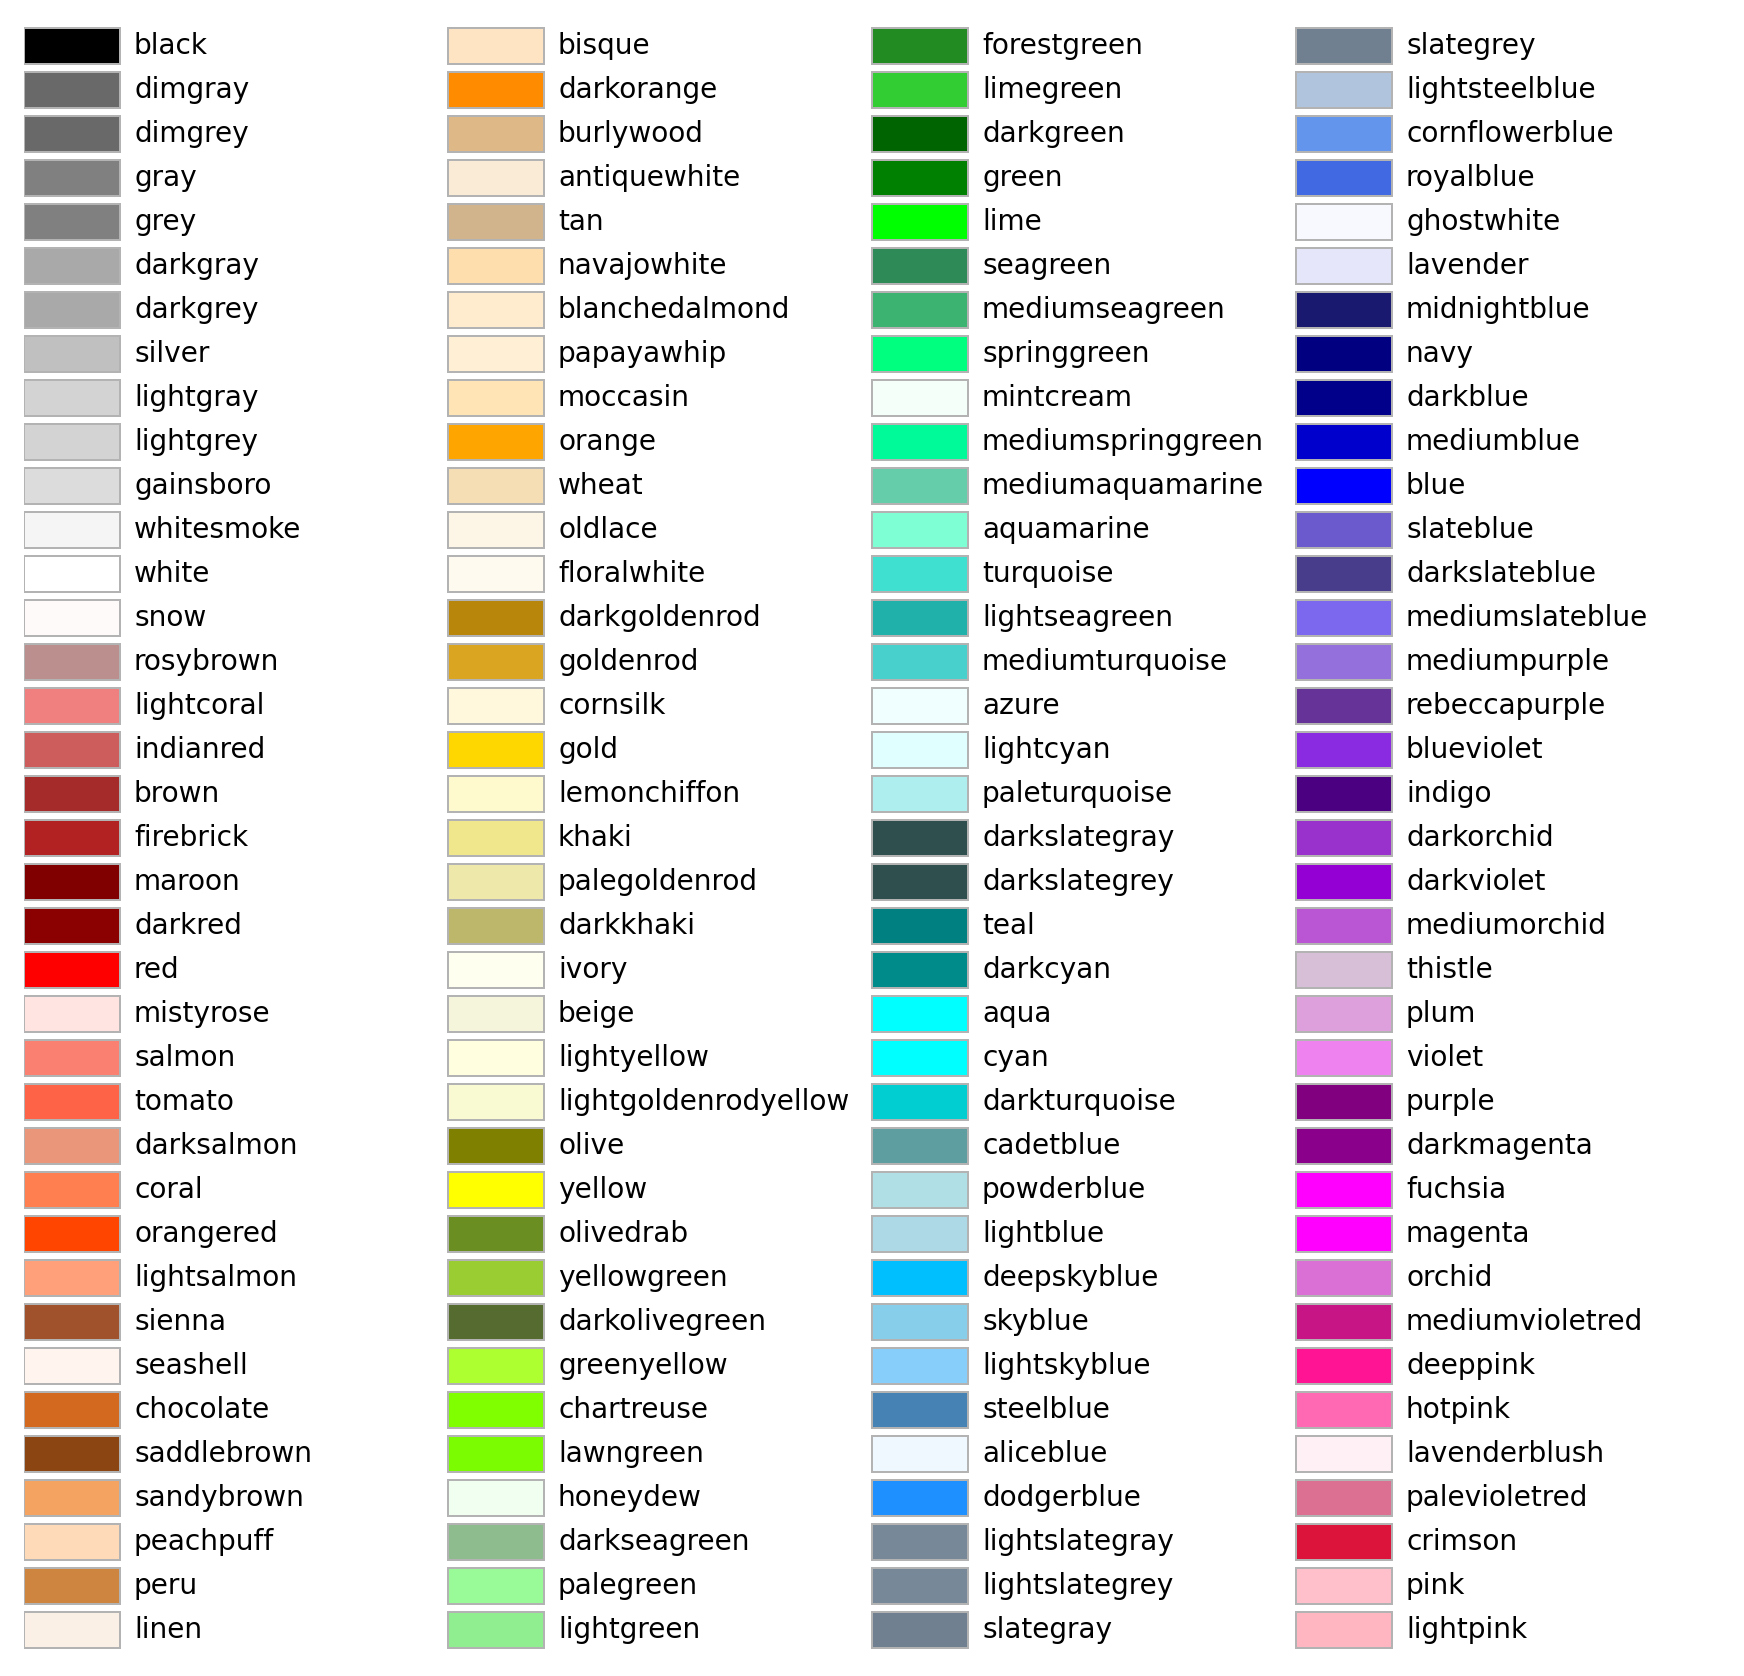


#### **Mark types and line types**
* For markers, see [here](https://matplotlib.org/stable/api/markers_api.html)
* For line types, see [here](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)